In [112]:
%%bash
# head data/peda.json
ls

data
peda.json
scripts
tweepy-large.ipynb
tweepy-small.ipynb
twitter-mining.ipynb


In [1]:
%matplotlib inline

import json
import pandas as pd
import matplotlib.pyplot as plt


tweets_data_path = 'data/dilmahash.txt'

tweets_data = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

print len(tweets_data)

358293


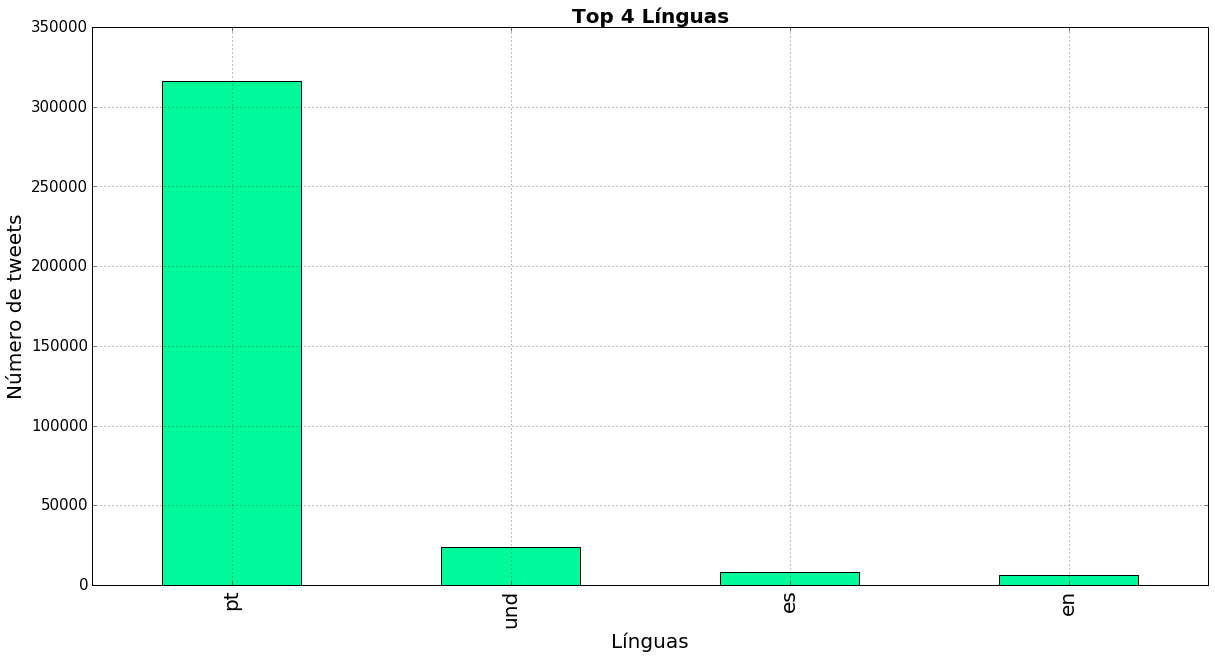

In [40]:
tweets = pd.DataFrame()

tweets['text'] = map(lambda tweet: tweet['text'], tweets_data)
tweets['lang'] = map(lambda tweet: tweet['lang'], tweets_data)
tweets['country'] = map(lambda tweet: tweet['place']['country']
                        if tweet['place'] != None else None, tweets_data)

tweets_by_lang = tweets['lang'].value_counts()

fig, ax = plt.subplots(figsize=(20,10))
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=15)
ax.set_xlabel('Línguas'.decode('utf-8'), fontsize=20)
ax.set_ylabel('Número de tweets'.decode('utf-8') , fontsize=20)
ax.set_title('Top 4 Línguas'.decode('utf-8'), fontsize=20, fontweight='bold')
tweets_by_lang[:4].plot(ax=ax, kind='bar', color='mediumspringgreen')
plt.grid()


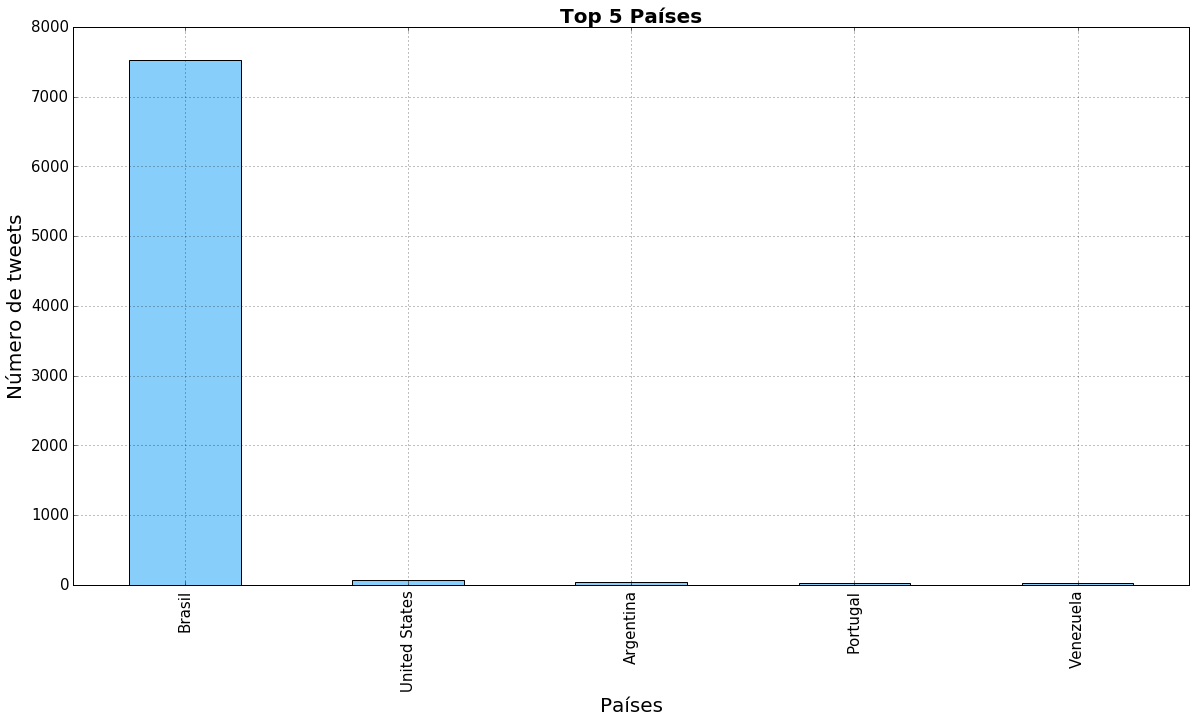

In [4]:
tweets_by_country = tweets['country'].value_counts()

fig, ax = plt.subplots(figsize=(20,10))
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.set_xlabel('Países'.decode('utf-8'), fontsize=20)
ax.set_ylabel('Número de tweets'.decode('utf-8') , fontsize=20)
ax.set_title('Top 5 Países'.decode('utf-8'), fontsize=20, fontweight='bold')
tweets_by_country[:5].plot(ax=ax, kind='bar', color='lightskyblue')
plt.grid()

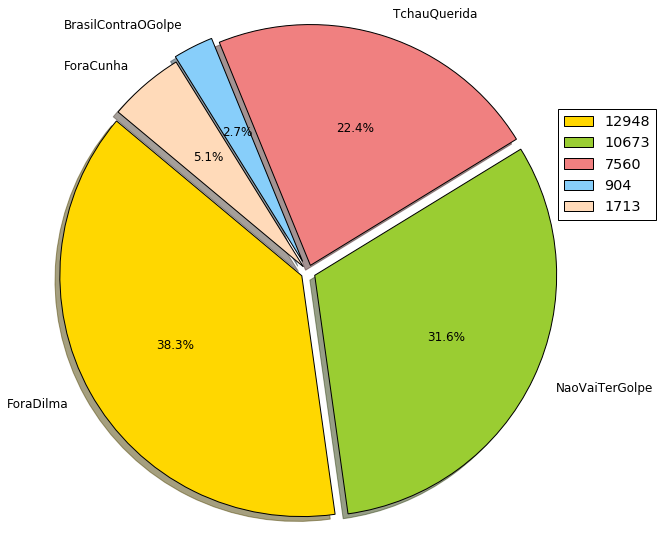

In [88]:
import re


def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    if match:
        return True
    return False

tweets['NaoVaiTerGolpe'] = tweets['text'].apply(lambda tweet: word_in_text('NaoVaiTerGolpe', tweet))
tweets['TchauQuerida'] = tweets['text'].apply(lambda tweet: word_in_text('TchauQuerida', tweet))
tweets['ForaDilma'] = tweets['text'].apply(lambda tweet: word_in_text('ForaDilma', tweet))
tweets['BrasilContraOGolpe'] = tweets['text'].apply(lambda tweet: word_in_text('BrasilContraOGolpe', tweet))
tweets['ForaCunha'] = tweets['text'].apply(lambda tweet: word_in_text('ForaCunha', tweet))

# print tweets['FicaQuerida'].value_counts()[True]
# print tweets['NaoVaiTerGolpe'].value_counts()[True]
# print tweets['ForaPT'].value_counts()[True]

hashtags = ['ForaDilma', 'NaoVaiTerGolpe', 'TchauQuerida', 'BrasilContraOGolpe', 'ForaCunha']
tweets_by_hashtags = [tweets['ForaDilma'].value_counts()[True],
                      tweets['NaoVaiTerGolpe'].value_counts()[True],
                      tweets['TchauQuerida'].value_counts()[True],
                      tweets['BrasilContraOGolpe'].value_counts()[True],
                      tweets['ForaCunha'].value_counts()[True]]

plt.subplots(figsize=(9,9))
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'peachpuff']
explode = (0.03, 0.03, 0.03, 0.05, 0.03)
plt.pie(tweets_by_hashtags, explode=explode, labels=hashtags, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.rcParams['font.size'] = 12
plt.legend(tweets_by_hashtags, loc=(1,.6))
plt.axis('equal')
plt.show()

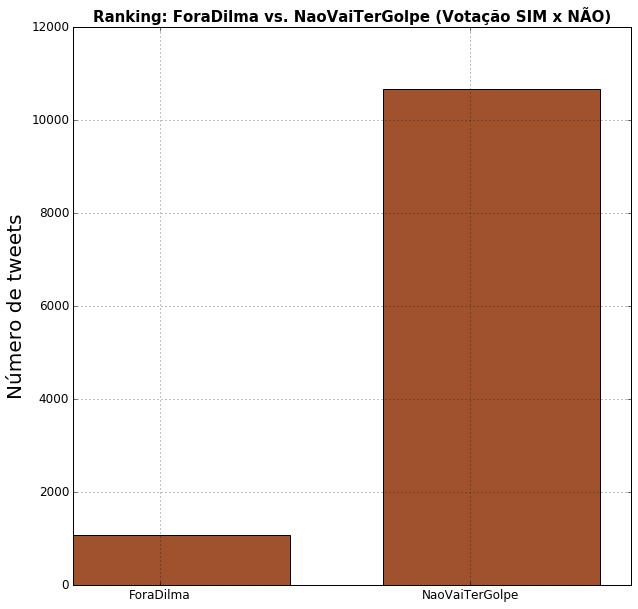

In [111]:
tweets['nao'] = tweets['text'].apply(lambda tweet: word_in_text('nao', tweet))
tweets['sim'] = tweets['text'].apply(lambda tweet: word_in_text('sim', tweet))

tweets['ImpeachmentDay'] = tweets['text'].apply(lambda tweet: word_in_text('sim', tweet) 
                                          or word_in_text('nao', tweet))

# print tweets['nao'].value_counts()[True]
# print tweets['sim'].value_counts()[True]
# print tweets['ImpeachmentDay'].value_counts()[True]

# print tweets[tweets['ImpeachmentDay'] == True]['ForaDilma'].value_counts()[True]
# print tweets[tweets['ImpeachmentDay'] == True]['NaoVaiTerGolpe'].value_counts()[True]

hashtags = ['ForaDilma', 'NaoVaiTerGolpe']
tweets_by_hashtags = [tweets[tweets['ImpeachmentDay'] == True]['ForaDilma'].value_counts()[True], 
                      tweets[tweets['ImpeachmentDay'] == True]['NaoVaiTerGolpe'].value_counts()[True]]

x_pos = list(range(len(hashtags)))
width = 0.7
fig, ax = plt.subplots(figsize=(10,10))
plt.bar(x_pos, tweets_by_hashtags, width, alpha=1, color='sienna')
ax.set_ylabel('Número de tweets'.decode('utf-8'), fontsize=20)
ax.set_title('Ranking: ForaDilma vs. NaoVaiTerGolpe (Votação SIM x NÃO)'.decode('utf-8'),
             fontsize=15, fontweight='bold')
ax.set_xticks([p + 0.4 * width for p in x_pos])
ax.set_xticklabels(hashtags)
plt.grid()

In [30]:
def extract_link(text):
    regex = r'https?://[^\s<>"]+|www\.[^\s<>"]+'
    match = re.search(regex, text)
    if match:
        return match.group()
    return ''

tweets['link'] = tweets['text'].apply(lambda tweet: extract_link(tweet))

tweets_relevant = tweets[tweets['ImpeachmentDay'] == True]
tweets_relevant_with_link = tweets_relevant[tweets_relevant['link'] != '']

print tweets_relevant_with_link[tweets_relevant_with_link['TchauQuerida'] == True]['link']
print tweets_relevant_with_link[tweets_relevant_with_link['ForaDilma'] == True]['link']
print tweets_relevant_with_link[tweets_relevant_with_link['ForaCunha'] == True]['link']
print tweets_relevant_with_link[tweets_relevant_with_link['NaoVaiTerGolpe'] == True]['link']

4299      https://t.co/IYejR7iWb1
8871      https://t.co/rtOavI9uQP
8906      https://t.co/VswJPAt5ul
9619      https://t.co/IiXU4ICRrH
9685      https://t.co/tlt3wTQ969
9904      https://t.co/y2MILsrv6I
45728     https://t.co/crggdefh02
53250     https://t.co/Y50qDJkPXp
62948     https://t.co/5mqsWBDIHh
63335     https://t.co/Kck2W7uc9B
64182     https://t.co/Odd6HZPlJU
67891     https://t.co/yJ1BGtHGHd
68558     https://t.co/rTvrUyAHA9
83968     https://t.co/XinE7SVm1F
90123     https://t.co/gAraHA4Fdt
90129     https://t.co/XinE7SVm1F
91107     https://t.co/XinE7SVm1F
91160     https://t.co/XinE7SVm1F
101356    https://t.co/6hOBQnYHhW
101573    https://t.co/nmY20txeMW
102084    https://t.co/9H9LU1CebE
102695    https://t.co/FdpW6olPVF
103257    https://t.co/KQmKoFRUcX
103954    https://t.co/brnPZh3Ruc
104091    https://t.co/h9SUq42jJp
105028    https://t.co/KQd41ZTwYW
105442    https://t.co/qZszc7jYNy
105724    https://t.co/I8Wv0IBzpe
106003    https://t.co/5HcF1xPBDj
108539    http

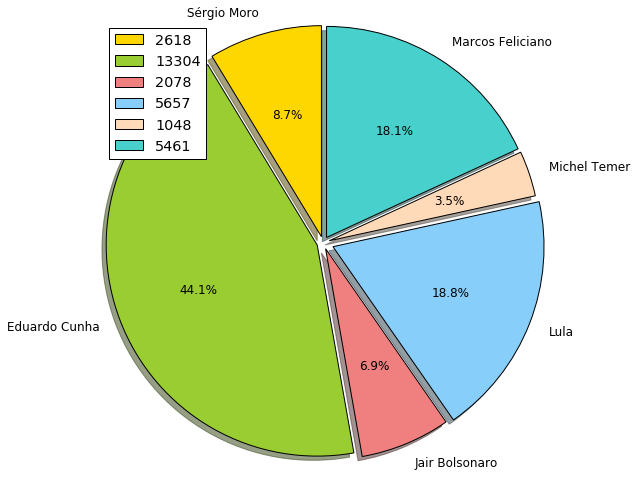

In [95]:
tweets['moro'] = tweets['text'].apply(lambda tweet: word_in_text('moro', tweet))
tweets['cunha'] = tweets['text'].apply(lambda tweet: word_in_text('cunha', tweet))
tweets['bolsonaro'] = tweets['text'].apply(lambda tweet: word_in_text('bolsonaro', tweet))
tweets['lula'] = tweets['text'].apply(lambda tweet: word_in_text('lula', tweet))
tweets['temer'] = tweets['text'].apply(lambda tweet: word_in_text('temer', tweet))
tweets['feliciano'] = tweets['text'].apply(lambda tweet: word_in_text('feliciano', tweet))

hashtags = ['Sérgio Moro'.decode('utf-8'), 'Eduardo Cunha', 'Jair Bolsonaro', 'Lula', 'Michel Temer', 'Marcos Feliciano']
tweets_by_hashtags = [tweets['moro'].value_counts()[True],
                      tweets['cunha'].value_counts()[True],
                      tweets['bolsonaro'].value_counts()[True],
                      tweets['lula'].value_counts()[True],
                      tweets['feliciano'].value_counts()[True],
                      tweets['temer'].value_counts()[True]]

plt.subplots(figsize=(8,8))
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'peachpuff', 'mediumturquoise']
explode = (0.03, 0.03, 0.03, 0.05, 0.03, 0.03)
plt.pie(tweets_by_hashtags, explode=explode, labels=hashtags, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.rcParams['font.size'] = 12
plt.legend(tweets_by_hashtags, loc='best')
plt.axis('equal')
plt.show()

In [ ]:
import io, json

def twitter_search(q, max_results=1000, **kw):
    search_results = twitter_api.search.tweets(q=q, count=1000, **kw)
    
    statuses = search_results['statuses']
    
    max_results = min(10000, max_results)
    
    for _ in range(10):
        try:
            next_results = search_results['search_metadata']['next_resuts']
        except KeyError, e:
            break
            
        kwargs = dict([ kv.split('=')
                        for kv in next_results[1:].split("&") ])
        
        search_results = twitter_api.search.tweets(**kwargs)
        statuses += search_results['statuses']
        
        if len(statuses) > max_results:
            break
            
    return statuses

twitter_api = oauth_login()

q = 'ForaInternetLimitada'
results = twitter_search(twitter_api, q, max_results=1000)

print json.dumps(results[0], indent=1)
                    
    

In [ ]:
def save_json(filename, data):
    with io.open('data/{0}.json'.format(filename),
                 'w', encoding='utf-8') as f:
            f.write(unicode(json.dumps(data, ensure_ascii=False)))
    
def load_json(filename):
    with io.open('data/{0}.json'.format(filename),
                  encoding='utf-8') as f:
            return f.read()

q = 'ForaInternetLimitada'



twitter_api = oauth_login()
results = twitter_search(twitter_api, q, max_results=1000)

save_json(q, results)
results = load_json(q)

# print json.dumps(results, indent=1)

# print json.dumps(br_trends, indent=1)

